<a href="https://colab.research.google.com/github/Harshbhatt2409/Principal-Component-Analysis/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import pandas as pd

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

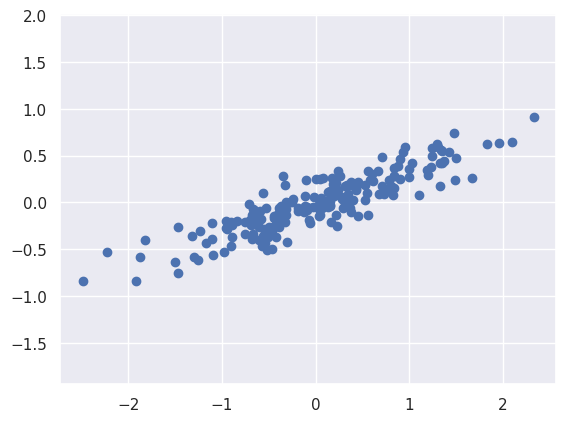

In [ ]:
rng = np.random.RandomState(1)
A=rng.rand(2, 2)
B=rng.randn(2, 200)
X = np.dot(A,B).T # x.T is x transposed
plt.scatter(X[:, 0], X[:, 1]) #200 pairs of random points
plt.axis('equal')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


0.7625315008826115 [-0.94446029 -0.32862557]
---vector [ 0.03351168 -0.00408072] [2.50770626 0.85681689]
0.018477895513562572 [-0.32862557  0.94446029]
---vector [ 0.03351168 -0.00408072] [ 0.16752528 -0.38923188]
---variance and components [0.7625315 0.0184779] [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

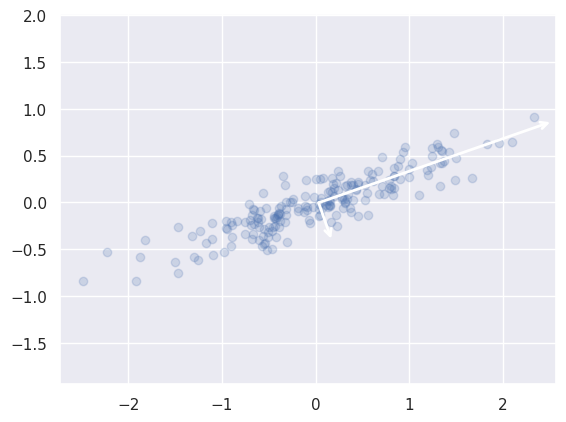

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_): #picks one from the first and one from the second
    print(length,vector)
    v = vector * 3 * np.sqrt(length) # 3 to make vec visible
    print("---vector",pca.mean_, pca.mean_ - v)
    draw_vector(pca.mean_, pca.mean_ - v)
print("---variance and components",pca.explained_variance_, pca.components_) # expl vari is for each compone
plt.axis('equal')

###PCA as dimensionality reduction

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

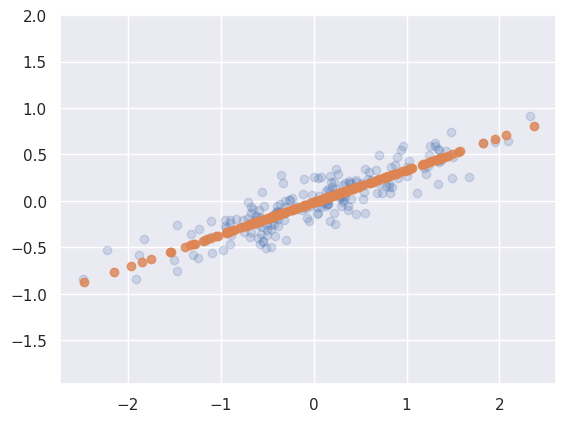

In [ ]:
X_new = pca.inverse_transform(X_pca)
# after removing one axis with lowest variance, transforming and transforming back
# print(X[:10,:])
# print(X_pca[:10,:])
# print(X_new[:10,:])
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

### PCA for visualization: Hand-written digits

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
pca = PCA(n_components=2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


<ipython-input-11-58d506a0ad0c>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


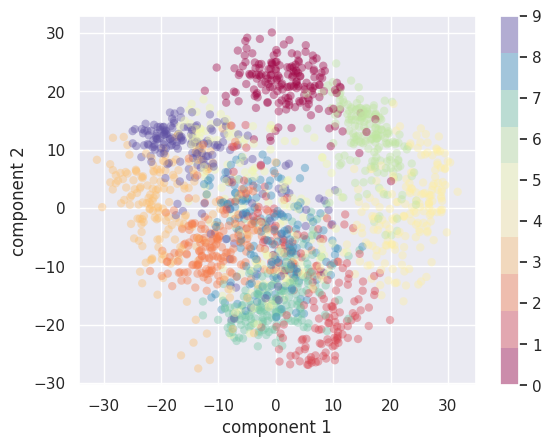

In [ ]:
import matplotlib.cm

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.4,
            # cmap=plt.cm.get_cmap('spectral', 10))
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

Text(0, 0.5, 'cumulative explained variance')

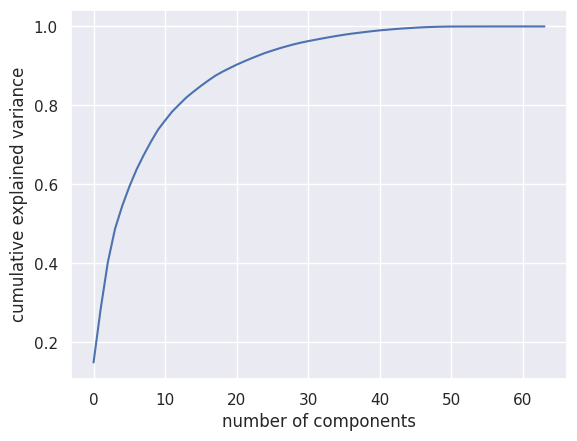

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #perc of variance for this dim of the sum of variance
# print(pca.explained_variance_ratio_) # cuml of % of var, goes to 1
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### PCA as Noise Filtering

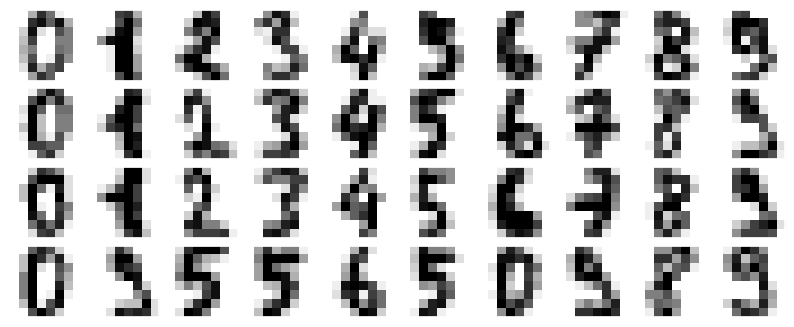

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

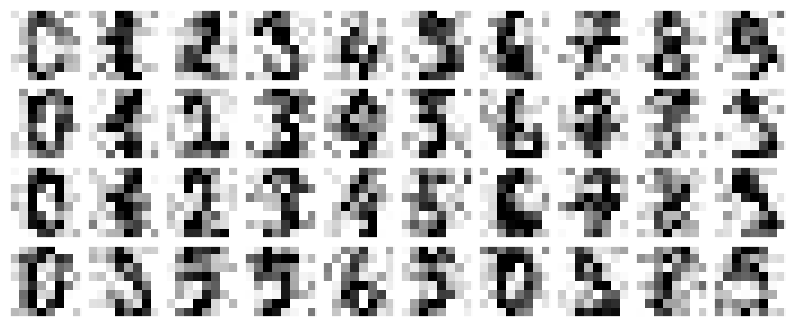

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [ ]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

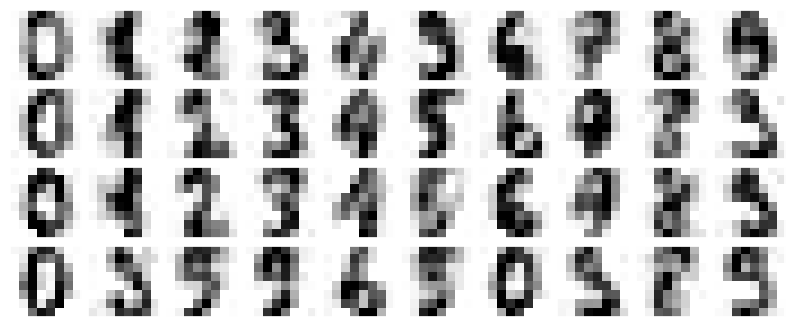

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

####PCA projection to facial image data using Labeled faces

Example: Eigenfaces

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
# RandomizedPCA is deprecated, do this
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)
pca = PCA(n_components=150,svd_solver='randomized').fit(faces.data)

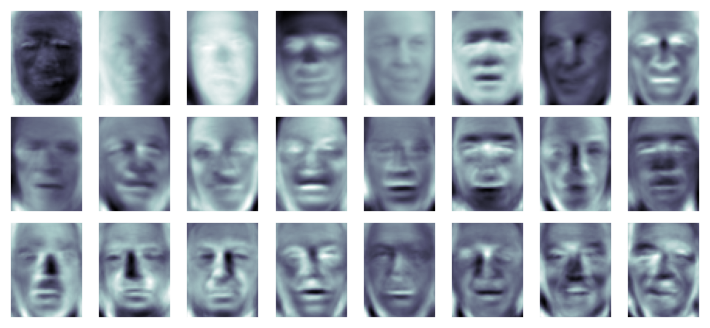

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

<Figure size 640x480 with 0 Axes>

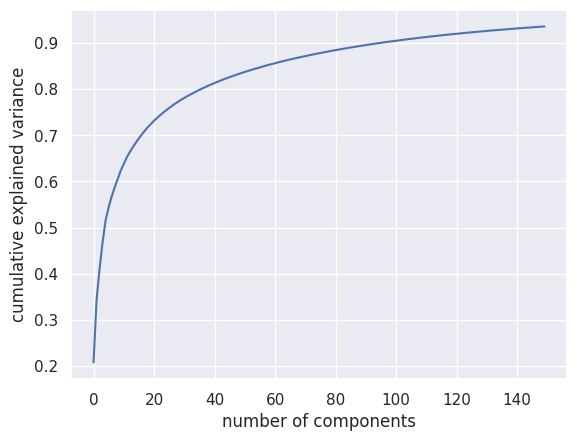

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.figure()

In [ ]:
# Compute the components and projected faces
#pca = RandomizedPCA(150).fit(faces.data)
pca = PCA(n_components=150,svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, '150-dim\nreconstruction')

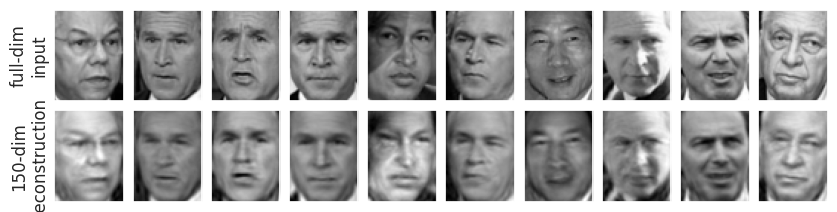

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')

### Chi square Test

Chi-square statistic: 300.00


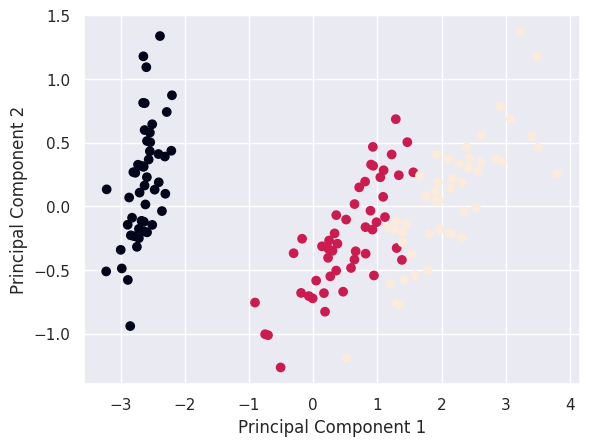

In [ ]:
from sklearn.linear_model import Ridge
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Regularization: Train a Ridge regression model with L2 regularization
model = Ridge(alpha=0.5)
model.fit(X, y)

# Chi-square test: Calculate the chi-square test statistic and p-value
observed = [[50, 0, 0], [0, 50, 0], [0, 0, 50]]
chi2, p, dof, expected = chi2_contingency(observed)
print(f"Chi-square statistic: {chi2:.2f}")

# PCA: Perform PCA on the Iris dataset and plot the results
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

###Task 1

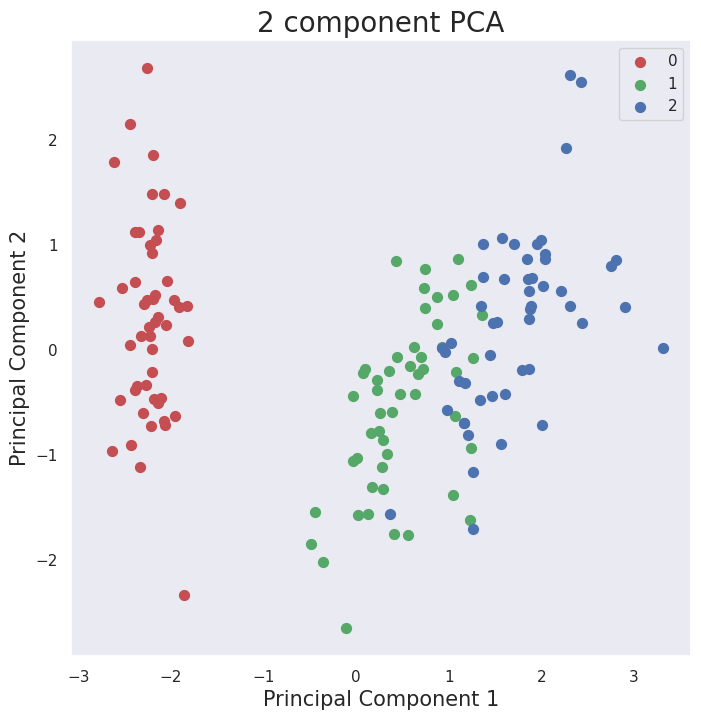

In [ ]:
# Solution Task -1: Import the necessary libraries and load the Iris dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA on the standardized data using scikit-learn
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)
principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

# Visualize the results by plotting the principal components
final_df = pd.concat([principal_df, pd.DataFrame(y, columns = ['target'])], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PC1'], final_df.loc[indicesToKeep, 'PC2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

# Interpret the results of the PCA
# The principal components represent the linear combinations of the original features that explain the most variance in the data. In this case, PC1 represents a combination of sepal length and sepal width that explains the most variance, while PC2 represents a combination of petal length and petal width that explains the next most variance. The different classes (setosa, versicolor, and virginica) separate well in the principal component space, suggesting that the first two principal components can be used to effectively distinguish between the different classes.

# (Optional) Cross-validate the results using a k-fold cross-validation approach.
# To cross-validate the results, you can split the data into k-folds, perform PCA on each fold separately, and evaluate the performance on a test set. The performance can be compared to using PCA on the entire dataset to see if there is any improvement in performance or generalizability.

### Task 2: PCA for Noise Filtering

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


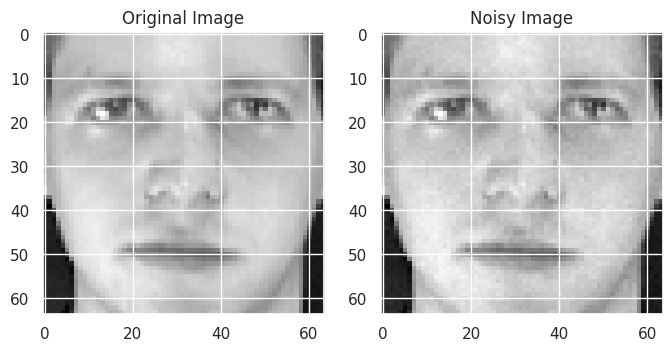

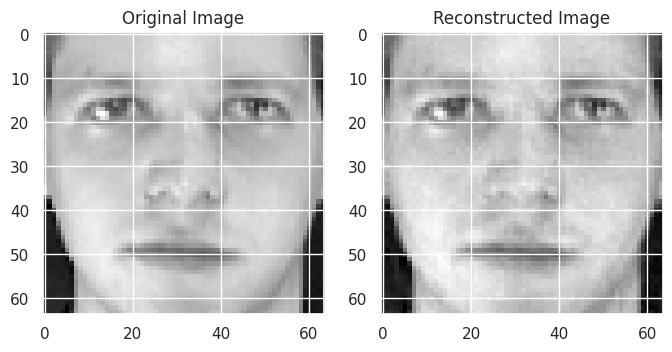

In [ ]:
# Solution: Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the "Olivetti Faces" dataset
olivetti_faces = fetch_olivetti_faces()

# Add random noise to the dataset
noise = np.random.normal(loc=0, scale=0.01, size=olivetti_faces.data.shape)
olivetti_faces_noisy = olivetti_faces.data + noise

# Visualize the dataset
fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=100)
axes[0].imshow(olivetti_faces.images[0], cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(olivetti_faces_noisy.reshape(-1, 64, 64)[0], cmap='gray')
axes[1].set_title('Noisy Image')
plt.show()

# Reshape the data into 2D array
olivetti_faces_noisy = olivetti_faces_noisy.reshape(olivetti_faces_noisy.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
olivetti_faces_noisy_std = scaler.fit_transform(olivetti_faces_noisy)

# Perform PCA on the standardized data
pca = PCA()
pca.fit(olivetti_faces_noisy_std)

# Determine the number of principal components to keep based on the explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.99) + 1

# Reconstruct the data using the selected principal components
pca = PCA(n_components=n_components)
olivetti_faces_noisy_reduced = pca.fit_transform(olivetti_faces_noisy_std)
olivetti_faces_reconstructed = pca.inverse_transform(olivetti_faces_noisy_reduced)
olivetti_faces_reconstructed = scaler.inverse_transform(olivetti_faces_reconstructed)

# Visualize the reconstructed data and compare it to the original data
fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=100)
axes[0].imshow(olivetti_faces.images[0], cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(olivetti_faces_reconstructed.reshape(-1, 64, 64)[0], cmap='gray')
axes[1].set_title('Reconstructed Image')
plt.show()